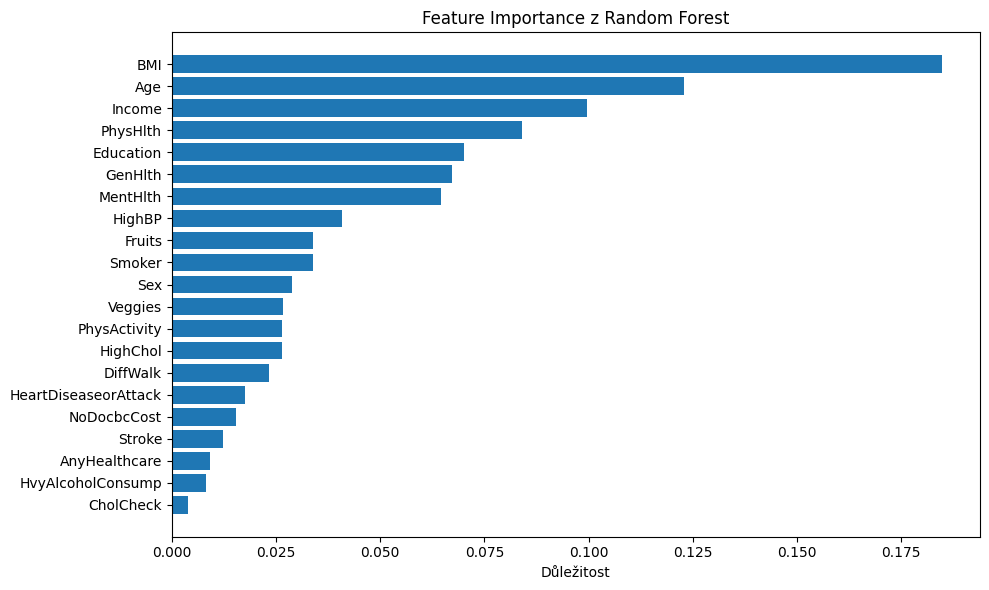

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('../Data/diabetes_012_health_indicators_BRFSS2015.csv')

X = diabetes_df.drop("Diabetes_012", axis=1)
y = diabetes_df["Diabetes_012"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [3]:
importance_df[importance_df['Importance'] > 0.02]

,Feature,Importance
3,BMI,0.184720
18,Age,0.122828
20,Income,0.099751
15,PhysHlth,0.084019
19,Education,0.070048
13,GenHlth,0.067250
14,MentHlth,0.064505
0,HighBP,0.040921
8,Fruits,0.033977
4,Smoker,0.033804


In [4]:
importance_df['Cumulative'] = importance_df['Importance'].cumsum()
top_features = importance_df[importance_df['Cumulative'] <= 0.8]

In [5]:
top_features

,Feature,Importance,Cumulative
3,BMI,0.184720,0.184720
18,Age,0.122828,0.307548
20,Income,0.099751,0.407299
15,PhysHlth,0.084019,0.491318
19,Education,0.070048,0.561366
13,GenHlth,0.067250,0.628617
14,MentHlth,0.064505,0.693122
0,HighBP,0.040921,0.734042
8,Fruits,0.033977,0.768020


In [9]:
top_features["Feature"].to_list()

['BMI',
 'Age',
 'Income',
 'PhysHlth',
 'Education',
 'GenHlth',
 'MentHlth',
 'HighBP',
 'Fruits']